### 🌱 Objectif du Projet 3 – Évaluation intelligente de l’empreinte carbone
Développer un système capable de **modéliser et prévoir l’évolution de l’empreinte carbone** d’un bâtiment d’entreprise à partir de :
- **Usages énergétiques** : consommation d’électricité, chauffage, refroidissement, etc.
- **Conditions climatiques** : température, humidité, ensoleillement, précipitations, etc.
- **Données contextuelles** : taux d’occupation, calendrier, événements spéciaux.

Random Forest (RF) : utilisé pour sa robustesse face aux données hétérogènes et sa capacité à capturer les relations non linéaires.

Random Forest avec Grid Search : optimisation des hyperparamètres du modèle RF afin d’améliorer ses performances prédictives.

XGBoost : algorithme de gradient boosting performant, adapté aux jeux de données tabulaires et capable de gérer efficacement les valeurs manquantes.

Multi-Layer Perceptron (MLP) : réseau de neurones dense permettant de modéliser des relations complexes entre les variables.

Long Short-Term Memory (LSTM) : réseau de neurones récurrent spécialisé dans le traitement des séries temporelles, utilisé pour capturer les dépendances à long terme dans l’évolution des émission


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lecture initiale pour afficher les colonnes
df = pd.read_csv(r'..\clean_data\finalFF.csv')
print(df.columns.tolist())
df.head()

['Unnamed: 0', 'timestamp', 'ACB', 'BH', 'DB', 'GH', 'LB', 'LCB', 'SRB', 'working_day', 'activity', 'hour', 'dayofweek', 'month', 'transfomer_1_kwh', 'transfomer_2_kwh', 'transfomer_3_kwh', 'BH_pow_kwh', 'BH_bac_pow_kwh', 'SRB_pow_kwh', 'GH_pow_kwh', 'GH_bac_pow_kwh', 'LCB_pow_kwh', 'LB_pow_kwh', 'DB_pow_kwh', 'electricity_kwh', 'CO2_total', 'temperature', 'humidity']


,Unnamed: 0,timestamp,ACB,BH,DB,GH,LB,LCB,SRB,working_day,...,SRB_pow_kwh,GH_pow_kwh,GH_bac_pow_kwh,LCB_pow_kwh,LB_pow_kwh,DB_pow_kwh,electricity_kwh,CO2_total,temperature,humidity
0,0,2017-01-01 00:00:00,2,9,4,4,1,1,1,0,...,8.603824,8.270609,8.230579,0.0,9.389554,34.432400,351.921549,288.223748,13.1,90
1,1,2017-01-01 01:00:00,2,11,4,5,2,1,1,0,...,8.492463,9.563984,8.589677,0.0,9.392264,24.477401,372.593313,305.153923,12.7,92
2,2,2017-01-01 02:00:00,3,13,5,5,1,1,2,0,...,9.134514,10.894123,9.679417,0.0,9.538334,21.701411,372.131910,304.776034,12.3,93
3,3,2017-01-01 03:00:00,3,15,6,5,2,1,1,0,...,10.093143,9.368700,8.143238,0.0,9.275677,25.618846,388.632748,318.290220,12.1,93
4,4,2017-01-01 04:00:00,3,11,4,3,2,1,1,0,...,9.920296,7.630611,7.723895,0.0,5.831044,22.365295,371.691431,304.415282,11.8,94


In [3]:
print(df.columns.tolist())


['Unnamed: 0', 'timestamp', 'ACB', 'BH', 'DB', 'GH', 'LB', 'LCB', 'SRB', 'working_day', 'activity', 'hour', 'dayofweek', 'month', 'transfomer_1_kwh', 'transfomer_2_kwh', 'transfomer_3_kwh', 'BH_pow_kwh', 'BH_bac_pow_kwh', 'SRB_pow_kwh', 'GH_pow_kwh', 'GH_bac_pow_kwh', 'LCB_pow_kwh', 'LB_pow_kwh', 'DB_pow_kwh', 'electricity_kwh', 'CO2_total', 'temperature', 'humidity']


In [4]:
#df = df.drop(columns=['Unnamed: 0'])


In [5]:
print(df.columns.tolist())


['Unnamed: 0', 'timestamp', 'ACB', 'BH', 'DB', 'GH', 'LB', 'LCB', 'SRB', 'working_day', 'activity', 'hour', 'dayofweek', 'month', 'transfomer_1_kwh', 'transfomer_2_kwh', 'transfomer_3_kwh', 'BH_pow_kwh', 'BH_bac_pow_kwh', 'SRB_pow_kwh', 'GH_pow_kwh', 'GH_bac_pow_kwh', 'LCB_pow_kwh', 'LB_pow_kwh', 'DB_pow_kwh', 'electricity_kwh', 'CO2_total', 'temperature', 'humidity']


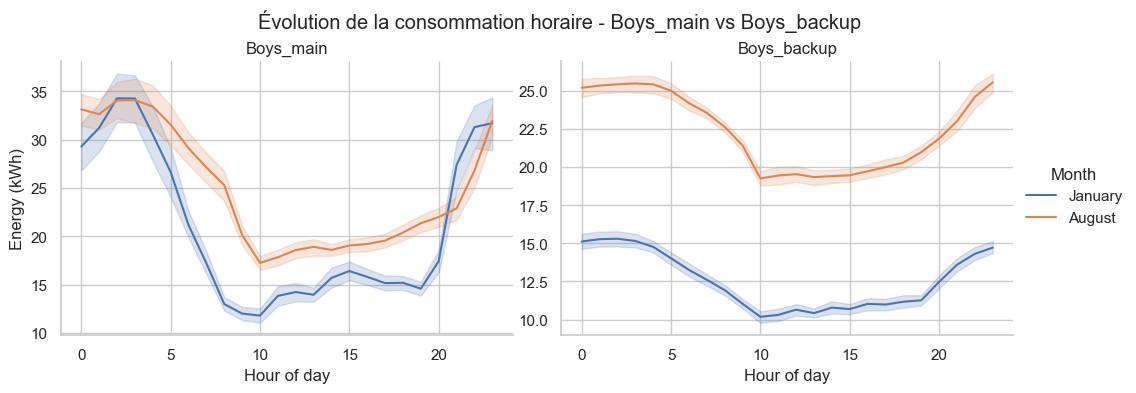

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 👉 Charger ton dataset
# df = pd.read_csv("ton_fichier.csv", parse_dates=['timestamp'])

# 1. Ne garder que les colonnes utiles
cols = ['hour', 'month', 'BH_pow_kwh', 'BH_bac_pow_kwh']
df_subset = df[cols].copy()

# 2. Filtrer uniquement janvier et août
df_subset = df_subset[df_subset['month'].isin([1, 8])]

# 3. Transformer les noms des colonnes
df_melted = df_subset.melt(id_vars=['hour', 'month'], 
                           value_vars=['BH_pow_kwh', 'BH_bac_pow_kwh'],
                           var_name='variable', value_name='value')

# 4. Nommer les variables proprement
df_melted['variable'] = df_melted['variable'].map({
    'BH_pow_kwh': 'Boys_main',
    'BH_bac_pow_kwh': 'Boys_backup'
})

# 5. Remplacer les mois par des noms
df_melted['month'] = df_melted['month'].map({1: 'January', 8: 'August'})

# 6. Tracer
sns.set(style="whitegrid")
g = sns.FacetGrid(df_melted, col="variable", hue="month", height=4, aspect=1.3, sharey=False)
g.map(sns.lineplot, "hour", "value")
g.add_legend(title="Month")
g.set_titles("{col_name}")
g.set_axis_labels("Hour of day", "Energy (kWh)")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Évolution de la consommation horaire - Boys_main vs Boys_backup")

plt.show()


In [7]:
df.head()

,Unnamed: 0,timestamp,ACB,BH,DB,GH,LB,LCB,SRB,working_day,...,SRB_pow_kwh,GH_pow_kwh,GH_bac_pow_kwh,LCB_pow_kwh,LB_pow_kwh,DB_pow_kwh,electricity_kwh,CO2_total,temperature,humidity
0,0,2017-01-01 00:00:00,2,9,4,4,1,1,1,0,...,8.603824,8.270609,8.230579,0.0,9.389554,34.432400,351.921549,288.223748,13.1,90
1,1,2017-01-01 01:00:00,2,11,4,5,2,1,1,0,...,8.492463,9.563984,8.589677,0.0,9.392264,24.477401,372.593313,305.153923,12.7,92
2,2,2017-01-01 02:00:00,3,13,5,5,1,1,2,0,...,9.134514,10.894123,9.679417,0.0,9.538334,21.701411,372.131910,304.776034,12.3,93
3,3,2017-01-01 03:00:00,3,15,6,5,2,1,1,0,...,10.093143,9.368700,8.143238,0.0,9.275677,25.618846,388.632748,318.290220,12.1,93
4,4,2017-01-01 04:00:00,3,11,4,3,2,1,1,0,...,9.920296,7.630611,7.723895,0.0,5.831044,22.365295,371.691431,304.415282,11.8,94


#cols = [timestamp,
    'ACB_pow', 'BH_pow', 'BH_bac_pow', 'SRB_pow', 'GH_pow', 'GH_bac_pow',
    'LCB_pow', 'LB_pow', 'DB_pow', 'ACB', 'BH', 'DB', 'GH', 'LB', 'LCB', 'SRB',
    'working_day', 'activity', 'hour', 'dayofweek', 'month',
    'transfomer_1_kwh', 'transfomer_2_kwh', 'transfomer_3_kwh',
    'BH_pow_kwh', 'BH_bac_pow_kwh', 'SRB_pow_kwh', 'GH_pow_kwh', 'GH_bac_pow_kwh',
    'LCB_pow_kwh', 'LB_pow_kwh', 'DB_pow_kwh', 'electricity_kwh',
    'CO2_total', 'temperature', 'humidity'
]

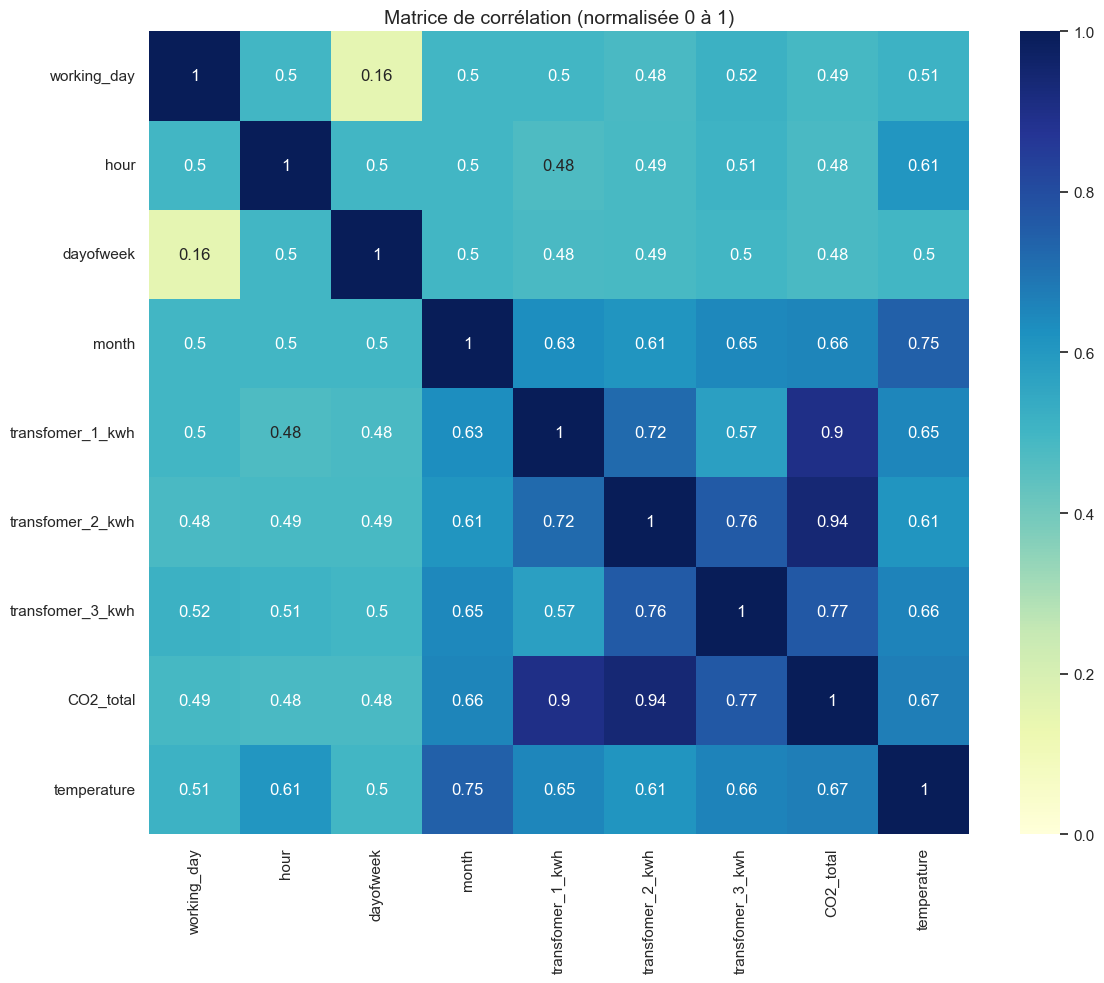

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des colonnes (hors 'timestamp')
cols = [
    
    'working_day', 'activity', 'hour', 'dayofweek', 'month',
    'transfomer_1_kwh', 'transfomer_2_kwh', 'transfomer_3_kwh',
    'CO2_total', 'temperature'
]
numeric_df = df[cols].select_dtypes(include=['number'])

# Calcul de la matrice de corrélation (de -1 à 1)
corr_matrix = numeric_df.corr()

# Normalisation entre 0 et 1
corr_matrix_norm = (corr_matrix + 1) / 2
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_norm, annot=True, cmap='YlGnBu', vmin=0, vmax=1)
plt.title('Matrice de corrélation (normalisée 0 à 1)', fontsize=14)
plt.tight_layout()
plt.show()  # <--- Très important !


In [9]:
df['activity'] = df['activity'].map({'L': 0, 'H': 1})


In [10]:
df['occupation_total'] = df[['ACB', 'BH', 'DB', 'GH', 'LB', 'LCB', 'SRB']].sum(axis=1)


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_4048\3338272837.py:21: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_4048\3338272837.py:21: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Mega-PC\Desktop\PROJECT CO2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Mega-PC\Desktop\PROJECT CO2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


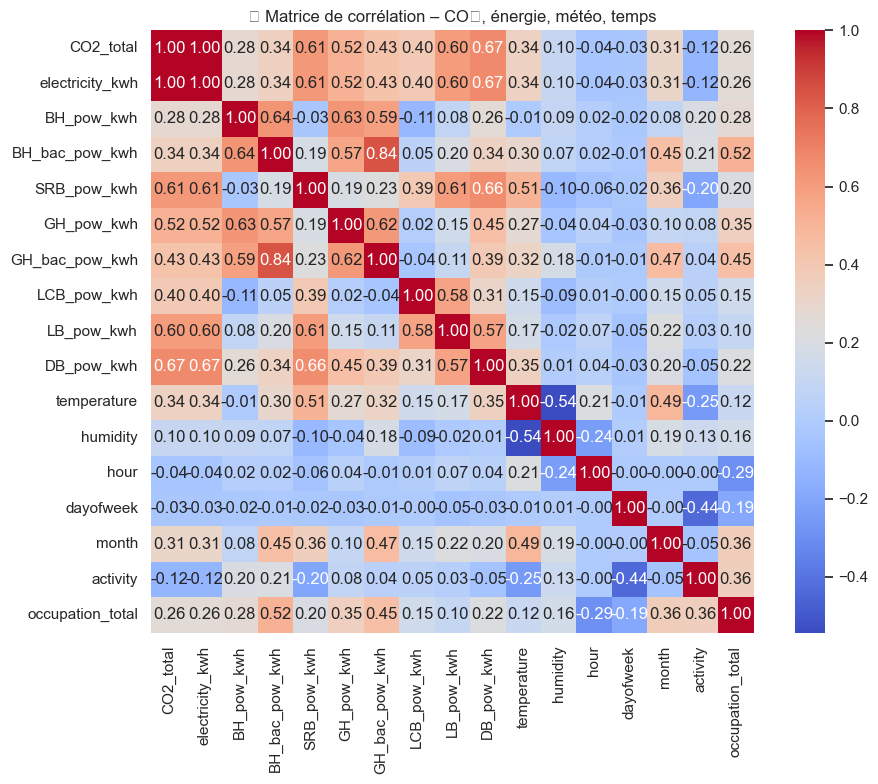

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ➤ Sélection des colonnes numériques pertinentes
cols_to_corr = [
    'CO2_total', 'electricity_kwh',
    'BH_pow_kwh', 'BH_bac_pow_kwh', 'SRB_pow_kwh', 'GH_pow_kwh', 'GH_bac_pow_kwh',
    'LCB_pow_kwh', 'LB_pow_kwh', 'DB_pow_kwh',
    'temperature', 'humidity',
    'hour', 'dayofweek', 'month', 'activity','occupation_total'
]

# ➤ Calcul de la matrice de corrélation
corr_matrix = df[cols_to_corr].corr()

# ➤ Affichage en heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("🔍 Matrice de corrélation – CO₂, énergie, météo, temps")
plt.tight_layout()
plt.show()


RANDOM FOREST

✅ RMSE : 58.589 
✅ R² Score : 0.720


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_4048\3261657321.py:59: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Mega-PC\Desktop\PROJECT CO2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


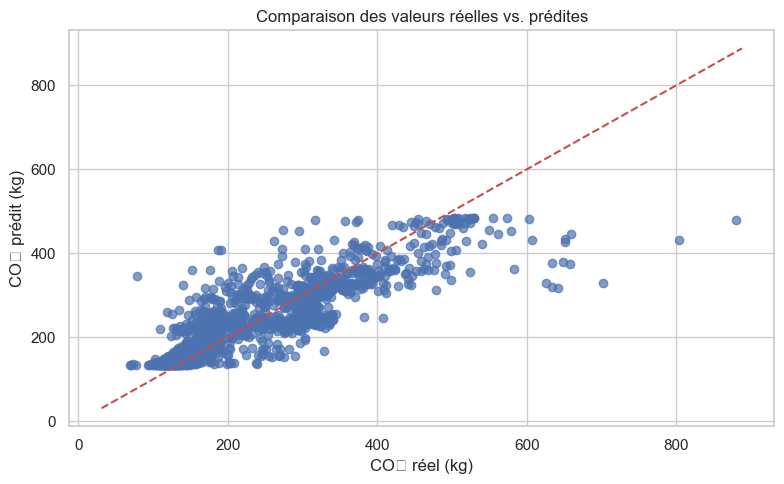

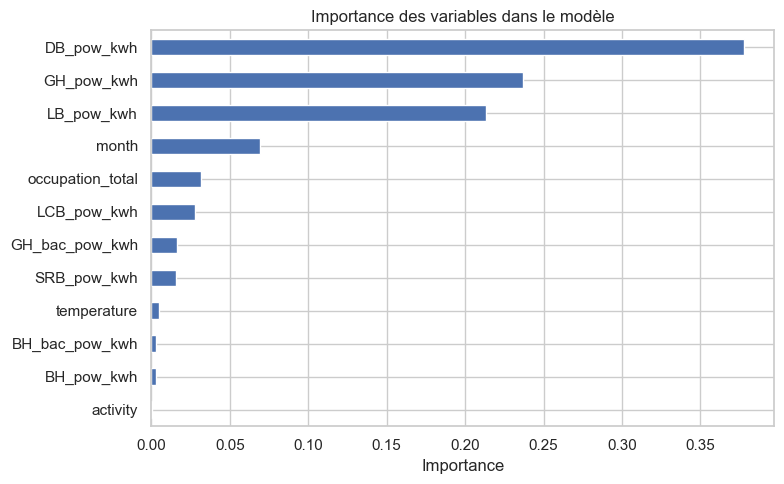

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Features (variables explicatives)
features = [
    'DB_pow_kwh',
    'GH_bac_pow_kwh',
    'SRB_pow_kwh',
    'GH_pow_kwh',
    'BH_bac_pow_kwh',
    'LCB_pow_kwh',
    'BH_pow_kwh',
    'LB_pow_kwh',
    'temperature',
    'month',
    'occupation_total',
    'activity'  # même si négative, potentiellement utile
]
# Cible (variable à prédire)
target = 'CO2_total'



# === 3. Split train/test ===

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === 4. Modèle Random Forest ===

model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# === 5. Évaluation ===

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE : {rmse:.3f} ")
print(f"✅ R² Score : {r2:.3f}")

# === 6. Visualisation : Réel vs. Prédit ===

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("CO₂ réel (kg)")
plt.ylabel("CO₂ prédit (kg)")
plt.title("Comparaison des valeurs réelles vs. prédites")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 7. Visualisation : Importance des variables ===

importances = model.feature_importances_
feat_importance = pd.Series(importances, index=features).sort_values(ascending=True)

plt.figure(figsize=(8, 5))
feat_importance.plot(kind='barh')
plt.title("Importance des variables dans le modèle")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 324 candidates, totalling 972 fits


c:\Users\Mega-PC\Desktop\PROJECT CO2\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
219 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mega-PC\Desktop\PROJECT CO2\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Mega-PC\Desktop\PROJECT CO2\.venv\Lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "c:\Users\Mega-PC\Desktop\PROJECT CO2\.venv\Lib\site-packages\sklearn\base.py", line 469, in _validate_params
    validate

🎯 Meilleurs paramètres : {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
✅ RMSE optimisé : 44.10 kg
✅ R² optimisé : 0.842


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_4048\2885869360.py:58: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Mega-PC\Desktop\PROJECT CO2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


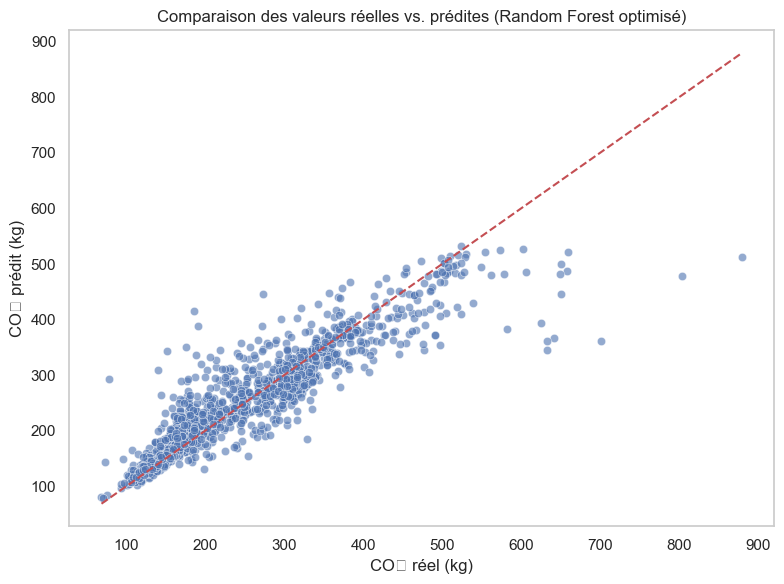

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Données
features = [ 
    'DB_pow_kwh', 'GH_bac_pow_kwh', 'SRB_pow_kwh', 'GH_pow_kwh',
    'BH_bac_pow_kwh', 'LCB_pow_kwh', 'BH_pow_kwh', 'LB_pow_kwh',
    'temperature', 'month', 'occupation_total', 'activity'
]
target = 'CO2_total'

X = df[features]
y = df[target]

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid de paramètres
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 0.8]
}

# Modèle avec GridSearch
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='neg_root_mean_squared_error', verbose=1)

grid_search.fit(X_train, y_train)

# Meilleurs paramètres
best_model = grid_search.best_estimator_
print("🎯 Meilleurs paramètres :", grid_search.best_params_)

# Évaluation
y_pred = best_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"✅ RMSE optimisé : {rmse:.2f} kg")
print(f"✅ R² optimisé : {r2:.3f}")

# Graphe réel vs prédit
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("CO₂ réel (kg)")
plt.ylabel("CO₂ prédit (kg)")
plt.title("Comparaison des valeurs réelles vs. prédites (Random Forest optimisé)")
plt.grid()
plt.tight_layout()
plt.show()


In [14]:
# Température × activité
df['temp_x_activity'] = df['temperature'] * df['activity']

# Densité d’occupation (en consommation par personne)
df['occupation_density'] = df['electricity_kwh'] / (df['occupation_total'] + 1e-3)

# Carré de température
df['temp_squared'] = df['temperature'] ** 2


✅ RMSE : 50.786 
✅ R² Score : 0.790


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_4048\2476753428.py:51: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Mega-PC\Desktop\PROJECT CO2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


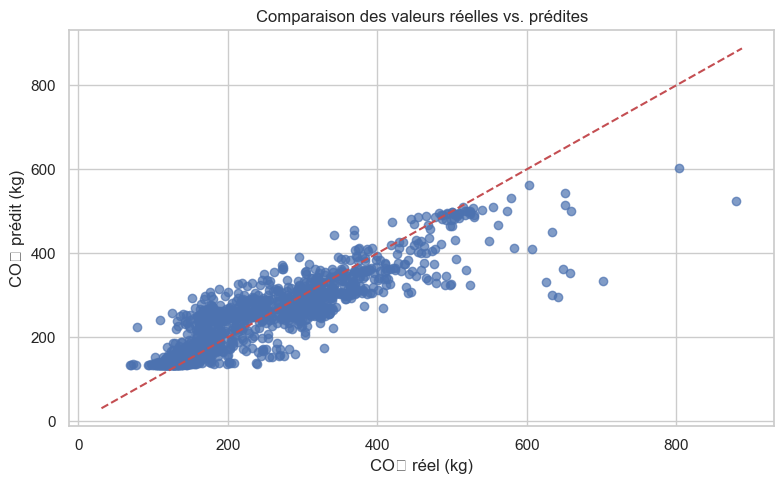

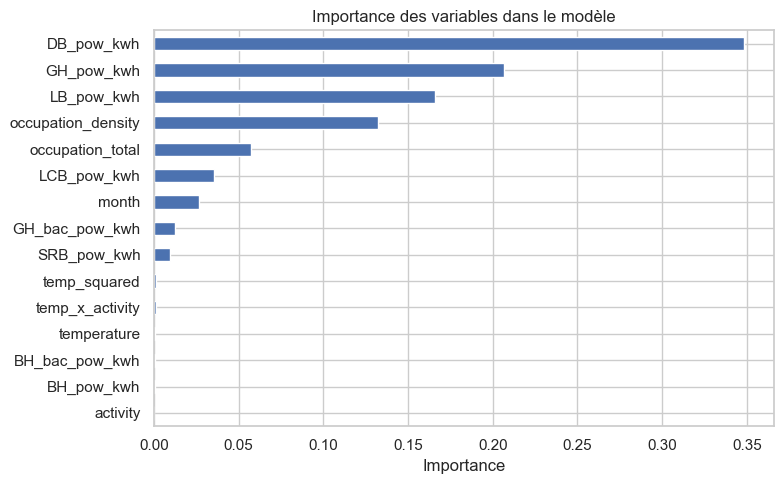

In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Features (variables explicatives)
features = [
    'DB_pow_kwh', 'GH_bac_pow_kwh', 'SRB_pow_kwh', 'GH_pow_kwh',
    'BH_bac_pow_kwh', 'LCB_pow_kwh', 'BH_pow_kwh', 'LB_pow_kwh',
    'temperature', 'month', 'occupation_total', 'activity',
    'temp_x_activity', 'occupation_density', 'temp_squared'
]
# Cible (variable à prédire)
target = 'CO2_total'



# === 3. Split train/test ===

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === 4. Modèle Random Forest ===

model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# === 5. Évaluation ===

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE : {rmse:.3f} ")
print(f"✅ R² Score : {r2:.3f}")

# === 6. Visualisation : Réel vs. Prédit ===

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("CO₂ réel (kg)")
plt.ylabel("CO₂ prédit (kg)")
plt.title("Comparaison des valeurs réelles vs. prédites")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 7. Visualisation : Importance des variables ===

importances = model.feature_importances_
feat_importance = pd.Series(importances, index=features).sort_values(ascending=True)

plt.figure(figsize=(8, 5))
feat_importance.plot(kind='barh')
plt.title("Importance des variables dans le modèle")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 324 candidates, totalling 972 fits


c:\Users\Mega-PC\Desktop\PROJECT CO2\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
142 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mega-PC\Desktop\PROJECT CO2\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Mega-PC\Desktop\PROJECT CO2\.venv\Lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "c:\Users\Mega-PC\Desktop\PROJECT CO2\.venv\Lib\site-packages\sklearn\base.py", line 469, in _validate_params
    validate

🎯 Meilleurs paramètres : {'max_depth': 20, 'max_features': 0.8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
✅ RMSE optimisé : 26.91 kg
✅ R² optimisé : 0.941


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_4048\2677494164.py:59: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Mega-PC\Desktop\PROJECT CO2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


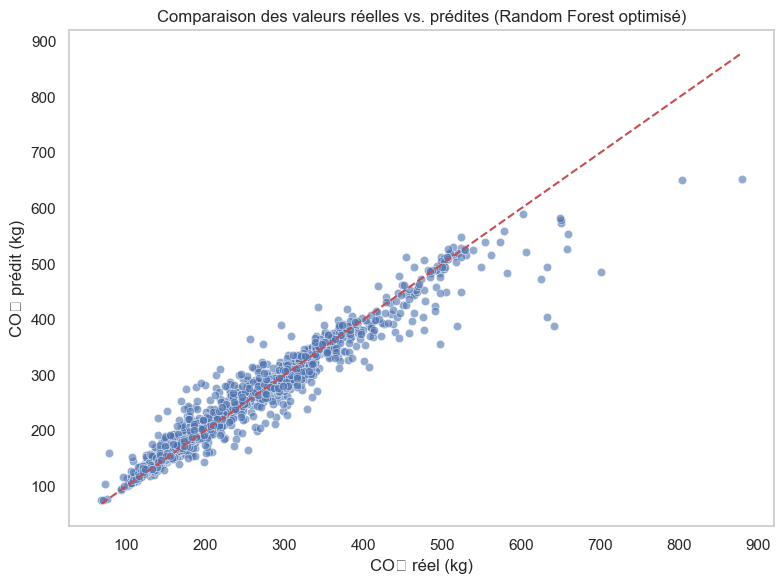

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Données
features = [
    'DB_pow_kwh', 'GH_bac_pow_kwh', 'SRB_pow_kwh', 'GH_pow_kwh',
    'BH_bac_pow_kwh', 'LCB_pow_kwh', 'BH_pow_kwh', 'LB_pow_kwh',
    'temperature', 'month', 'occupation_total', 'activity',
    'temp_x_activity', 'occupation_density', 'temp_squared'
]
target = 'CO2_total'

X = df[features]
y = df[target]

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid de paramètres
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 0.8]
}

# Modèle avec GridSearch
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='neg_root_mean_squared_error', verbose=1)

grid_search.fit(X_train, y_train)

# Meilleurs paramètres
best_model = grid_search.best_estimator_
print("🎯 Meilleurs paramètres :", grid_search.best_params_)

# Évaluation
y_pred = best_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"✅ RMSE optimisé : {rmse:.2f} kg")
print(f"✅ R² optimisé : {r2:.3f}")

# Graphe réel vs prédit
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("CO₂ réel (kg)")
plt.ylabel("CO₂ prédit (kg)")
plt.title("Comparaison des valeurs réelles vs. prédites (Random Forest optimisé)")
plt.grid()
plt.tight_layout()
plt.show()

📊 Évaluation Train vs Test
📘 RMSE train : 42.547 | R² train : 0.850
✅ RMSE test  : 47.049 | R² test  : 0.820

🔁 Validation croisée (5-Fold)
📉 RMSE CV : 59.40 ± 16.99
📈 R² CV   : 0.592 ± 0.138


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_4048\1701951547.py:67: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Mega-PC\Desktop\PROJECT CO2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


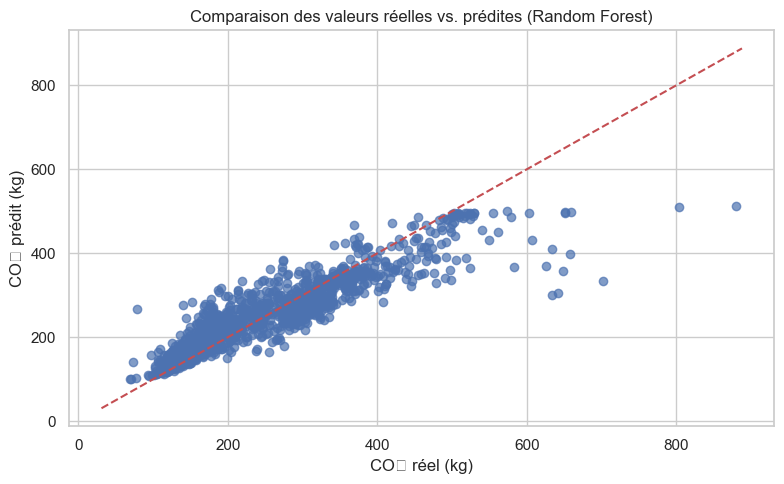

C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_4048\1701951547.py:77: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Mega-PC\Desktop\PROJECT CO2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


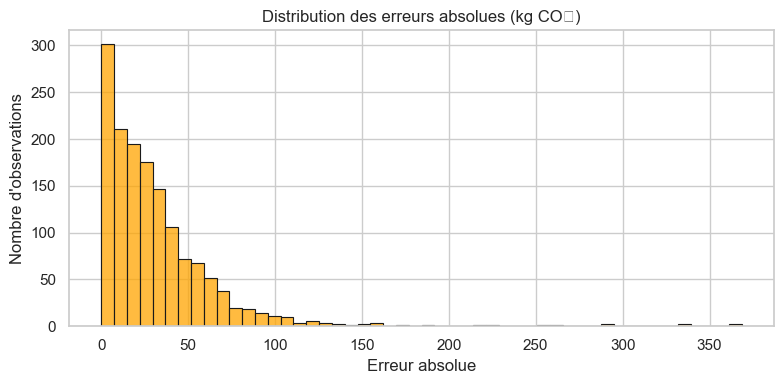

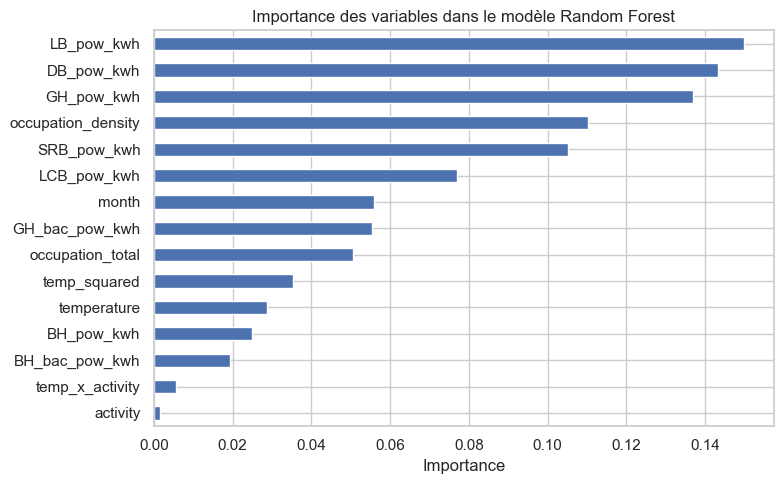

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# === 1. Définition des features ===
features = [
    'DB_pow_kwh', 'GH_bac_pow_kwh', 'SRB_pow_kwh', 'GH_pow_kwh',
    'BH_bac_pow_kwh', 'LCB_pow_kwh', 'BH_pow_kwh', 'LB_pow_kwh',
    'temperature', 'month', 'occupation_total', 'activity',
    'temp_x_activity', 'occupation_density', 'temp_squared'
]

target = 'CO2_total'

# === 2. Préparation des données ===
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === 3. Entraînement du modèle Random Forest (anti-overfitting) ===
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=7,
    min_samples_leaf=3,
    max_features='sqrt',
    random_state=42
)
model.fit(X_train, y_train)

# === 4. Prédiction et évaluation ===
y_pred = model.predict(X_test)
rmse_test = mean_squared_error(y_test, y_pred) ** 0.5
r2_test = r2_score(y_test, y_pred)

y_train_pred = model.predict(X_train)
rmse_train = mean_squared_error(y_train, y_train_pred) ** 0.5
r2_train = r2_score(y_train, y_train_pred)

print("📊 Évaluation Train vs Test")
print(f"📘 RMSE train : {rmse_train:.3f} | R² train : {r2_train:.3f}")
print(f"✅ RMSE test  : {rmse_test:.3f} | R² test  : {r2_test:.3f}")

# === 5. Validation croisée (5-fold) ===
cv_rmse = -cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')

print("\n🔁 Validation croisée (5-Fold)")
print(f"📉 RMSE CV : {cv_rmse.mean():.2f} ± {cv_rmse.std():.2f}")
print(f"📈 R² CV   : {cv_r2.mean():.3f} ± {cv_r2.std():.3f}")

# === 6. Visualisation : Réel vs Prédit ===
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("CO₂ réel (kg)")
plt.ylabel("CO₂ prédit (kg)")
plt.title("Comparaison des valeurs réelles vs. prédites (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 7. Erreurs absolues ===
errors = abs(y_test - y_pred)
plt.figure(figsize=(8, 4))
sns.histplot(errors, bins=50, color='orange', edgecolor='k')
plt.title("Distribution des erreurs absolues (kg CO₂)")
plt.xlabel("Erreur absolue")
plt.ylabel("Nombre d'observations")
plt.tight_layout()
plt.show()

# === 8. Importance des variables ===
importances = model.feature_importances_
feat_importance = pd.Series(importances, index=features).sort_values(ascending=True)

plt.figure(figsize=(8, 5))
feat_importance.plot(kind='barh')
plt.title("Importance des variables dans le modèle Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


# 🔍 Modèle de prédiction des émissions de CO₂ avec XGBoost

## 🎯 Objectif
Prédire la quantité de **CO₂ émise** (en kg) à partir de données énergétiques, météo et d’occupation du campus universitaire.

---

## 📊 Données utilisées

- **Cible (target)** : `CO2_total` (émissions totales en kg)
- **Variables explicatives (features)** :
  - `DB_pow_kwh`, `GH_bac_pow_kwh`, `SRB_pow_kwh`, `GH_pow_kwh`
  - `BH_bac_pow_kwh`, `LCB_pow_kwh`, `BH_pow_kwh`, `LB_pow_kwh`
  - `temperature`, `month`, `occupation_total`, `activity`

---

## ⚙️ Modèle : XGBoost Regressor

```python
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)


✅ RMSE (XGBoost) : 44.045 kg
✅ R² Score (XGBoost) : 0.842


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_4048\620191703.py:51: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Mega-PC\Desktop\PROJECT CO2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


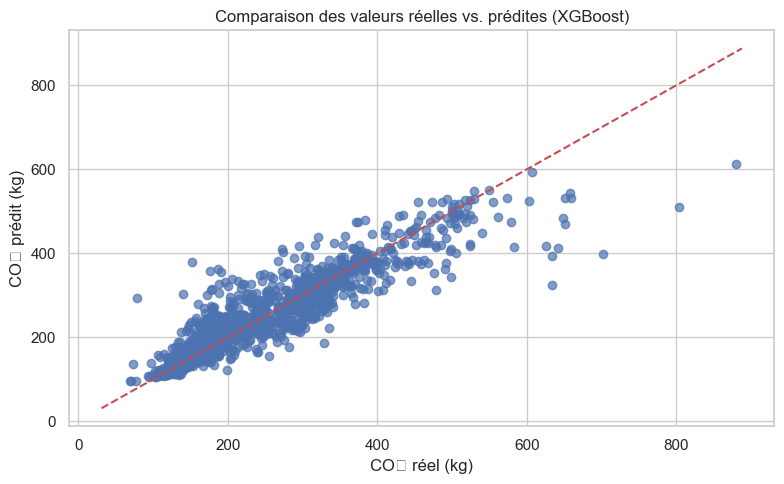

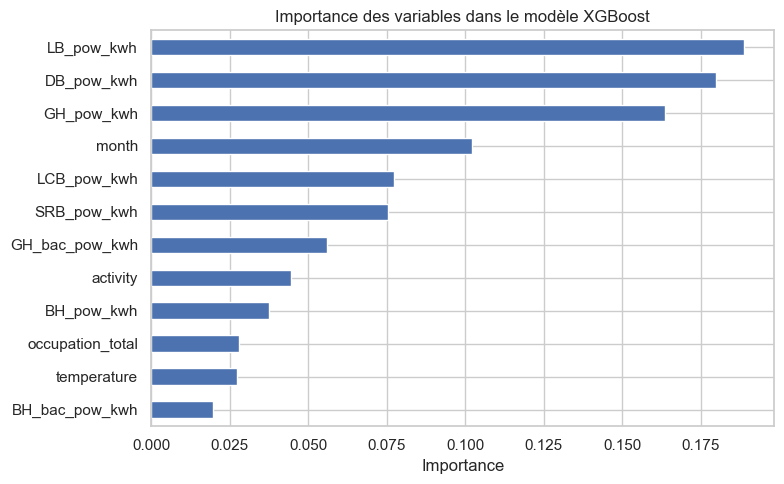

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# === 1. Définition des features et de la cible ===
features = [
    'DB_pow_kwh', 'GH_bac_pow_kwh', 'SRB_pow_kwh', 'GH_pow_kwh',
    'BH_bac_pow_kwh', 'LCB_pow_kwh', 'BH_pow_kwh', 'LB_pow_kwh',
    'temperature', 'month', 'occupation_total', 'activity'
]
target = 'CO2_total'

# === 2. Préparation des données ===
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === 3. Entraînement du modèle XGBoost ===
model = XGBRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)

# === 4. Évaluation ===
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE (XGBoost) : {rmse:.3f} kg")
print(f"✅ R² Score (XGBoost) : {r2:.3f}")

# === 5. Visualisation : Réel vs Prédit ===
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("CO₂ réel (kg)")
plt.ylabel("CO₂ prédit (kg)")
plt.title("Comparaison des valeurs réelles vs. prédites (XGBoost)")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 6. Importance des variables ===
importances = model.feature_importances_
feat_importance = pd.Series(importances, index=features).sort_values(ascending=True)

plt.figure(figsize=(8, 5))
feat_importance.plot(kind='barh')
plt.title("Importance des variables dans le modèle XGBoost")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


xg boost + streamlit 


✅ RMSE (XGBoost) : 44.045 kg
✅ R² Score (XGBoost) : 0.842


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_4048\623777344.py:65: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Mega-PC\Desktop\PROJECT CO2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


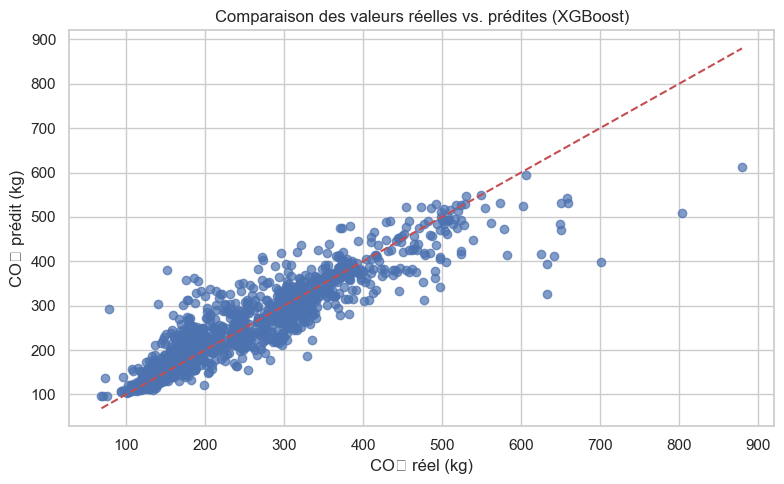

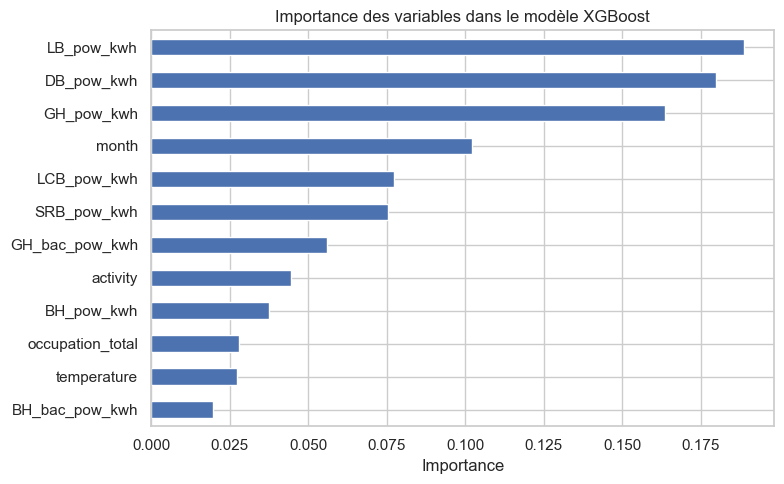

✅ Modèle et scalers exportés dans le dossier app/


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os

# === 1. Définition des features et de la cible ===
features = [ 
    'DB_pow_kwh', 'GH_bac_pow_kwh', 'SRB_pow_kwh', 'GH_pow_kwh',
    'BH_bac_pow_kwh', 'LCB_pow_kwh', 'BH_pow_kwh', 'LB_pow_kwh',
    'temperature', 'month', 'occupation_total', 'activity'
]
target = 'CO2_total'

# === 2. Préparation des données ===
X = df[features]
y = df[[target]]

# === 3. Normalisation
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# === 4. Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# === 5. Entraînement du modèle XGBoost ===
model = XGBRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)

# === 6. Évaluation ===
y_pred = model.predict(X_test)
y_pred_inv = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = scaler_y.inverse_transform(y_test)

rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"✅ RMSE (XGBoost) : {rmse:.3f} kg")
print(f"✅ R² Score (XGBoost) : {r2:.3f}")

# === 7. Visualisation : Réel vs Prédit ===
plt.figure(figsize=(8, 5))
plt.scatter(y_test_inv, y_pred_inv, alpha=0.7)
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'r--')
plt.xlabel("CO₂ réel (kg)")
plt.ylabel("CO₂ prédit (kg)")
plt.title("Comparaison des valeurs réelles vs. prédites (XGBoost)")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 8. Importance des variables ===
importances = model.feature_importances_
feat_importance = pd.Series(importances, index=features).sort_values(ascending=True)

plt.figure(figsize=(8, 5))
feat_importance.plot(kind='barh')
plt.title("Importance des variables dans le modèle XGBoost")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# === 9. Export du modèle et des scalers dans dossier app/ ===
os.makedirs("app", exist_ok=True)
joblib.dump(model, "app/model_xgboost_co2.pkl")
joblib.dump(scaler_X, "app/scaler_X.pkl")
joblib.dump(scaler_y, "app/scaler_y.pkl")

print("✅ Modèle et scalers exportés dans le dossier app/")


In [ ]:

from sklearn.model_selection import GridSearchCV

# === 3. Définition de la grille des hyperparamètres ===
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1]
}

xgb = XGBRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# === 4. Recherche des meilleurs paramètres ===
grid_search.fit(X_train, y_train)

# Récupérer le meilleur modèle
best_model = grid_search.best_estimator_

# Afficher les meilleurs hyperparamètres
print("\n🎯 Meilleurs paramètres trouvés :")
print(grid_search.best_params_)


Fitting 3 folds for each of 243 candidates, totalling 729 fits

🎯 Meilleurs paramètres trouvés :
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


In [ ]:
model = best_model
# Évaluation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE optimisé (XGBoost) : {rmse:.3f} kg")
print(f"✅ R² Score optimisé (XGBoost) : {r2:.3f}")



✅ RMSE optimisé (XGBoost) : 41.418 kg
✅ R² Score optimisé (XGBoost) : 0.860


lstm 

Epoch 1/100


c:\Users\Mega-PC\Desktop\PROJECT CO2\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


165/165 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0150 - val_loss: 0.0173
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0097 - val_loss: 0.0154
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.0085 - val_loss: 0.0102
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0073 - val_loss: 0.0089
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0067 - val_loss: 0.0082
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0062 - val_loss: 0.0114
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0060 - val_loss: 0.0089
Epoch 8/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0060 - val_loss: 0.0123
Epoch 9/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0054 - val_loss: 0.0162
Epoch 10/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0055 - val_loss: 0.0136
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
✅ RMSE (LSTM corrigé) : 134.00 kg
✅ R² Score (LSTM corrigé) : -0.800


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_10884\1882006329.py:91: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Mega-PC\Desktop\PROJECT CO2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


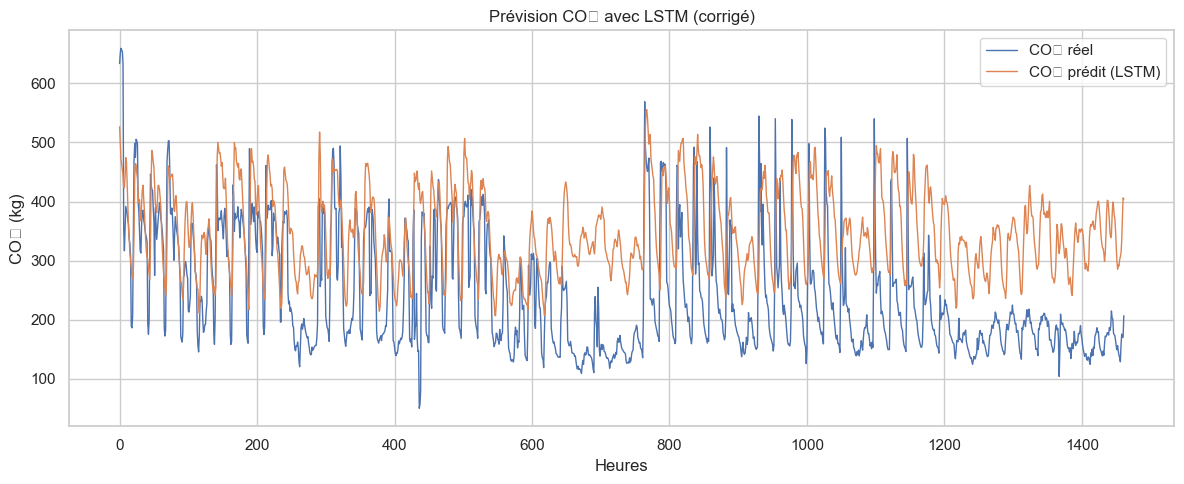

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# === 1. Colonnes ===
features = [
    'DB_pow_kwh', 'SRB_pow_kwh', 'GH_pow_kwh'
    , 'LCB_pow_kwh', 'BH_pow_kwh', 'LB_pow_kwh',
    'temperature', 'month', 'occupation_total', 'activity'
]
target = 'CO2_total'

df_lstm = df[features + [target]].dropna().copy()

# === 2. Normalisation séparée ===
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(df_lstm[features])

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(df_lstm[[target]])

# === 3. Création des séquences temporelles ===
def create_sequences(X, y, seq_length):
    Xs, ys = [], []
    for i in range(len(X) - seq_length):
        Xs.append(X[i:i+seq_length])
        ys.append(y[i+seq_length])
    return np.array(Xs), np.array(ys)

seq_length = 48  # 2 jours

X_seq, y_seq = create_sequences(X_scaled, y_scaled, seq_length)

# === 4. Split temporel (pas de shuffle) ===
split = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

# === 5. Modèle LSTM corrigé ===
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(seq_length, len(features))),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entraînement
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# === 6. Prédiction ===
y_pred = model.predict(X_test)

# Dénormalisation
y_test_denorm = scaler_y.inverse_transform(y_test)
y_pred_denorm = scaler_y.inverse_transform(y_pred)

# === 7. Évaluation ===
rmse = np.sqrt(mean_squared_error(y_test_denorm, y_pred_denorm))
r2 = r2_score(y_test_denorm, y_pred_denorm)

print(f"✅ RMSE (LSTM corrigé) : {rmse:.2f} kg")
print(f"✅ R² Score (LSTM corrigé) : {r2:.3f}")

# === 8. Visualisation ===
plt.figure(figsize=(12, 5))
plt.plot(y_test_denorm, label='CO₂ réel', linewidth=1)
plt.plot(y_pred_denorm, label='CO₂ prédit (LSTM)', linewidth=1)
plt.title("Prévision CO₂ avec LSTM (corrigé)")
plt.xlabel("Heures")
plt.ylabel("CO₂ (kg)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



MLP = Multi-Layer Perceptron


Epoch 1/100


c:\Users\Mega-PC\Desktop\PROJECT CO2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0330 - val_loss: 0.0067
Epoch 2/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0095 - val_loss: 0.0074
Epoch 3/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0085 - val_loss: 0.0069
Epoch 4/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0072 - val_loss: 0.0058
Epoch 5/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0070 - val_loss: 0.0054
Epoch 6/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0058 - val_loss: 0.0052
Epoch 7/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0058 - val_loss: 0.0050
Epoch 8/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0054 - val_loss: 0.0051
Epoch 9/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0053 - val_loss: 0.0050
Epoch 10/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0053 - val_loss: 0.0052
Epoch 11/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0047 - val_loss: 0.0051
Epoch 12/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_10884\3801861433.py:79: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Mega-PC\Desktop\PROJECT CO2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


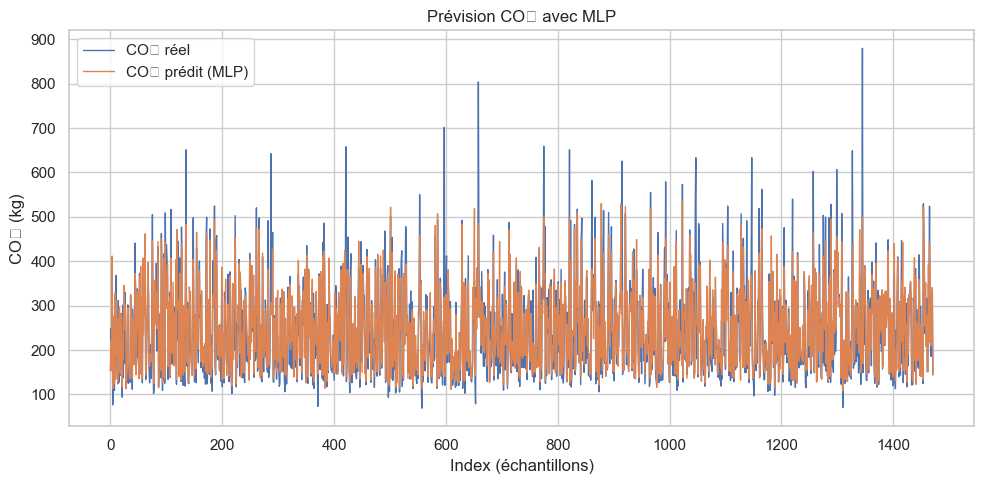

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# === 1. Sélection des features et de la cible ===
features = [
    'DB_pow_kwh', 'GH_bac_pow_kwh', 'SRB_pow_kwh', 'GH_pow_kwh',
    'BH_bac_pow_kwh', 'LCB_pow_kwh', 'BH_pow_kwh', 'LB_pow_kwh',
    'temperature', 'month', 'occupation_total', 'activity'
]
target = 'CO2_total'

df_mlp = df[features + [target]].dropna().copy()

# === 2. Normalisation des données ===
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(df_mlp[features])

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(df_mlp[[target]])

# === 3. Split train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# === 4. Construction du modèle MLP ===
model = Sequential([
    Dense(128, activation='relu', input_shape=(len(features),)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# === 5. Entraînement ===
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# === 6. Prédictions et évaluation ===
y_pred = model.predict(X_test)

# Dénormalisation
y_test_denorm = scaler_y.inverse_transform(y_test)
y_pred_denorm = scaler_y.inverse_transform(y_pred)

rmse = np.sqrt(mean_squared_error(y_test_denorm, y_pred_denorm))
r2 = r2_score(y_test_denorm, y_pred_denorm)

print(f"✅ RMSE (MLP) : {rmse:.2f} kg")
print(f"✅ R² Score (MLP) : {r2:.3f}")

# === 7. Visualisation ===
plt.figure(figsize=(10, 5))
plt.plot(y_test_denorm, label='CO₂ réel', linewidth=1)
plt.plot(y_pred_denorm, label='CO₂ prédit (MLP)', linewidth=1)
plt.title("Prévision CO₂ avec MLP")
plt.xlabel("Index (échantillons)")
plt.ylabel("CO₂ (kg)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


TRANSFORMER 

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 48, 12)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 48, 64)    │        832 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 48, 64)    │     66,368 │ dense_6[0][0],    │
│ (MultiHeadAttentio… │                   │            │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 48, 64)    │          0 │ dense_6[0][0],    │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 48, 64)    │        128 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 64)        │      4,160 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 64)        │          0 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 1)         │         65 │ dropout_9[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 71,553 (279.50 KB)

 Trainable params: 71,553 (279.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0653 - val_loss: 0.0161
Epoch 2/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0131 - val_loss: 0.0301
Epoch 3/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0127 - val_loss: 0.0163
Epoch 4/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0110 - val_loss: 0.0166
Epoch 5/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0107 - val_loss: 0.0169
Epoch 6/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0109 - val_loss: 0.0160
Epoch 7/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0104 - val_loss: 0.0160
Epoch 8/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0104 - val_loss: 0.0160
Epoch 9/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0102 - val_loss: 0.0161
Epoch 10/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0099 - val_loss: 0.0172
Epoch 11/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0093 - val_loss: 0.0164
Epoch 12/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 

C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_10884\3711537274.py:88: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Mega-PC\Desktop\PROJECT CO2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


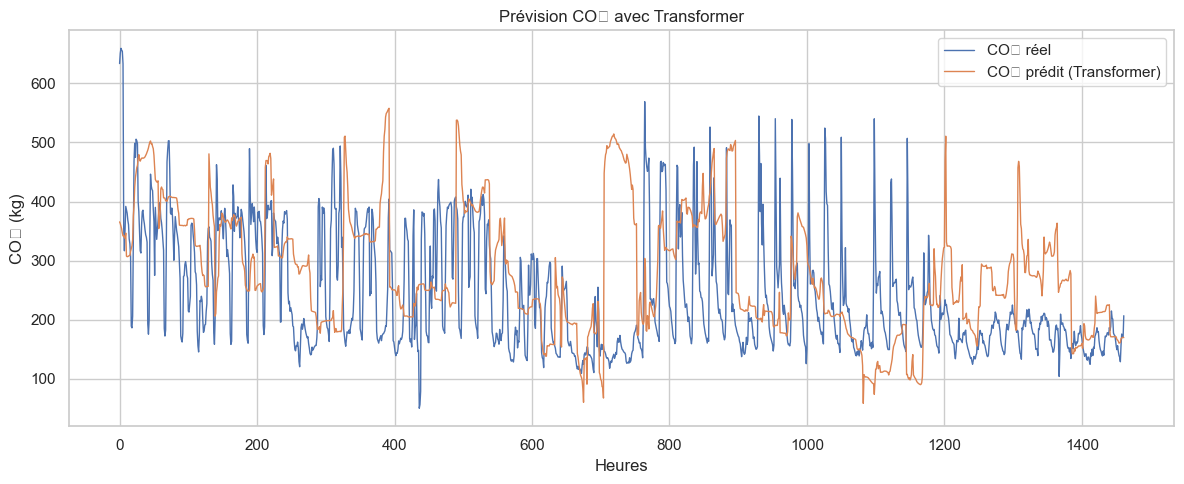

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# === Données ===
features = [
    'DB_pow_kwh', 'GH_bac_pow_kwh', 'SRB_pow_kwh', 'GH_pow_kwh',
    'BH_bac_pow_kwh', 'LCB_pow_kwh', 'BH_pow_kwh', 'LB_pow_kwh',
    'temperature', 'month', 'occupation_total', 'activity'
]
target = 'CO2_total'

df_t = df[features + [target]].dropna()

# === Normalisation ===
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(df_t[features])
y_scaled = scaler_y.fit_transform(df_t[[target]])

# === Séquences pour Transformer ===
def create_sequences(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

seq_len = 48
X_seq, y_seq = create_sequences(X_scaled, y_scaled, seq_len)

# === Split train/test (respect temporel) ===
split = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

# === Modèle Transformer ===
inputs = tf.keras.Input(shape=(seq_len, len(features)))

# Positional Encoding
positions = tf.range(start=0, limit=seq_len, delta=1)
embedding = layers.Dense(64)(inputs)
attention = layers.MultiHeadAttention(num_heads=4, key_dim=64)(embedding, embedding)
x = layers.Add()([embedding, attention])
x = layers.LayerNormalization()(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1)(x)

model = tf.keras.Model(inputs, outputs)
model.compile(optimizer='adam', loss='mse')
model.summary()

# === Entraînement ===
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=32,
    verbose=1
)

# === Prédiction ===
y_pred = model.predict(X_test)
y_pred_denorm = scaler_y.inverse_transform(y_pred)
y_test_denorm = scaler_y.inverse_transform(y_test)

# === Évaluation ===
rmse = np.sqrt(mean_squared_error(y_test_denorm, y_pred_denorm))
r2 = r2_score(y_test_denorm, y_pred_denorm)
print(f"✅ RMSE (Transformer) : {rmse:.2f} kg")
print(f"✅ R² Score (Transformer) : {r2:.3f}")

# === Visualisation ===
plt.figure(figsize=(12, 5))
plt.plot(y_test_denorm, label="CO₂ réel", linewidth=1)
plt.plot(y_pred_denorm, label="CO₂ prédit (Transformer)", linewidth=1)
plt.title("Prévision CO₂ avec Transformer")
plt.xlabel("Heures")
plt.ylabel("CO₂ (kg)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
